In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data=pd.read_csv(r'E:\智能系统俱乐部\23_sharing-main\8th\ex1data2.txt',names=['x1','x2','y'])



In [76]:
def normalize_feature(data):
    return (data-data.mean())/data.std()

In [77]:
data=normalize_feature(data)
data.head()

,x1,x2,y
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


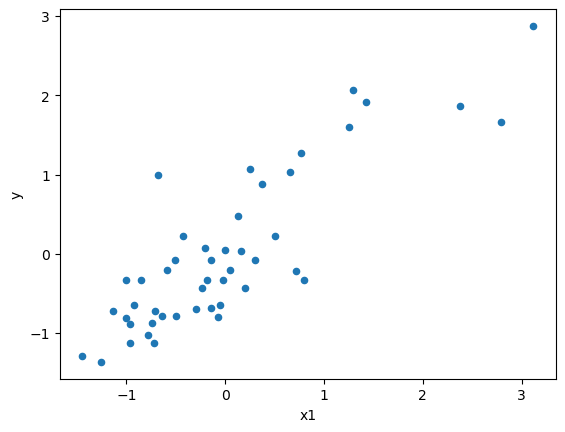

In [78]:
data.plot.scatter('x1','y')
plt.show()

In [79]:
data.insert(0,'oness',1)

In [80]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]


X = X.values
y = y.values
y = y.reshape(47,1)

In [81]:

#定义损失函数
def costF(X,y,theta):
    inner = np.power(X @ theta - y,2)
    return np.sum(inner)/(2*len(X))




In [82]:
#theta的初始值
theta = np.zeros((3,1))
theta.shape


(3, 1)

In [83]:
cost_init = costF(X,y,theta)
print(cost_init)

0.48936170212765967


In [84]:
#定义梯度下降函数
def gradient(X,y,theta,alpha,iters):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y)) * alpha / len(X)
        cost = costF(X,y,theta)
        costs.append(cost)
      
        
        if i % 100 == 0:
            print(cost)
            
            
    return theta,costs

In [85]:
alpha = 0.02
iters = 1000

theta,costs = gradient(X,y,theta,alpha,iters)

0.47186307832380486
0.14769069097087112
0.13361260686272108
0.13120498443304696
0.1307783896412616
0.13070277225055463
0.1306893683909453
0.13068699243667858
0.13068657127748678
0.1306864966232447


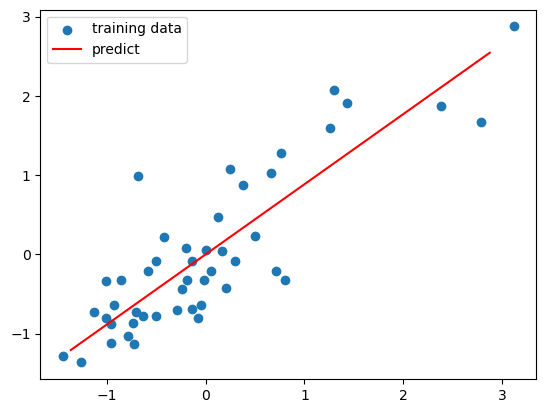

In [86]:
x = np.linspace(y.min(),y.max(),100)
y_= theta[0,0] + theta[1,0] * x


fig,ax = plt.subplots()
ax.scatter(X[:,1],y,label='training data')
ax.plot(x,y_,'r',label='predict')
ax.legend()

plt.show()